# Metody inteligencji obliczeniowej w analizie danych

Budowa modelu perceptronu wielowarstwowego (MLP) – sieci neuronowej typu feedforward.

## LAB 1 - Bazowa implementacja 

Należy zaimplementować sieć neuronową typu MLP, w której można ustawić:

* liczbę warstw
* liczbę neuronów w każdej z warstw
* wagi poszczególnych połączeń (w tym bias)

Sieć ma używać sigmoidalnej funkcji aktywacji:
$ \sigma(x) = \frac{e^x}{e^x + 1} = \frac{1}{1+e^{-x}}$, a na wyjściu może być funkcja liniowa.

Oprócz tego implementacja musi być przygotowana w taki sposób, żeby łatwo zmienić:

* architekturę (liczba wejść/wyjść, liczba neuronów w warstwach ukrytych)
* funkcję aktywacji

### Działanie

Przykładowo mamy następującą sieć:

![](img/nn_scheme-1.png)

Ma ona:

* dwa wejścia 
* warstwę ukrytą z czterema neuronami
* warstwę ukrytą z trzema neuronami
* dwa wyjścia 


Weźmy input o 100 obserwacjach. Mamy wtedy na wejściu macierz $X^{100 \times 2}$.

Na pierwszej ukrytej warstwie każdy neuron ma po dwa połączenia z wejściem. Te połączenia mają swoje wagi. Wagi wszystkich neuronów w tej warstwie można przedstawić w macierzy $W_1^{2 \times 4}$ (wagi i-tego neuronu są w i-tej kolumnie macierzy). Każdy neuron ma też swój bias. Biasy neuronów można zapisać w formie wektora $b_1^{1 \times 4}$. 

Przejście przez warstwę pierwszą można opisać poprzez: 
$$ Z_1 = XW_1 + b_1  \Longrightarrow  H_1 = f(Z_1),  \text{ gdzie } f \text{ jest funkcją aktywacji w tej warstwie}$$
Wynikowe $H_1$ jest macierzą o rozmiarach $100 \times 4$

Analogicznie przechodzimy przez drugą warstwę i otrzymujemy $H_2^{100 \times 3}$, a potem przez warstwę wyjściową i nasz output to macierz $\hat{Y}^{100 \times 2}$.

### Implementacja

Zrobiona jest w pliku _MLP.py_.


W skrócie sieć (klasa _MLP_) działa następująco:

* tworzy się instancję MLP, w której podaje się rozmiar wejścia, wyjścia i rozmiary ukrytych warstw
* wagi, biasy i funkcje aktywacji są ustawiane automatycznie, ale można jes zmienić funkcjami dla warstw
* na instancji MLP uruchomić metodę _predict_, sprawia ona, że input przechodzi kolejno przez warstwy używając ich metod _forward_
* jako output otrzymuje się wartości otrzymane z ostatniej warstwy


### Test na danych 

In [1]:
import numpy as np
import pandas as pd
from MLP import *   # zaimportowanie klasy MLP i kilku innych rzeczy

#### 1. square-simple

In [2]:
df_square = pd.read_csv("data/regression/square-simple-training.csv",index_col=0)
df_square_test = pd.read_csv("data/regression/square-simple-test.csv",index_col=0)
df_square.head() 

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852


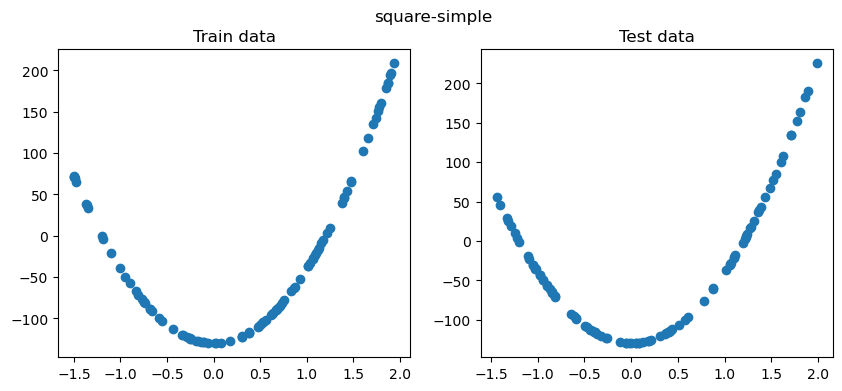

In [3]:
plot_data(title="square-simple",df_test=df_square_test,df_train=df_square)

Widać, że dane pochodzą z funkcji kwadratowej, tak jak mówi ich nazwa. Chcemy wykorzystać naszą sieć w regresji.

##### Sieć z jedną warstwą ukrytą o 5 neuronach

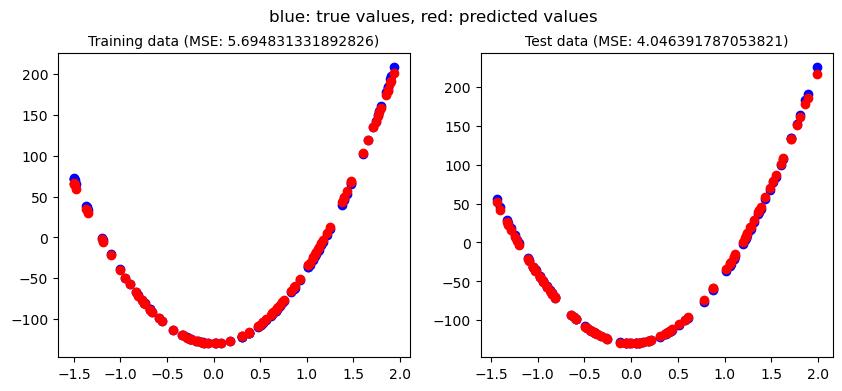

In [4]:
mlp = MLP(1,1, [5])

# hidden layer
mlp.layers[0].weights = np.array([1,1,1,1,1]).reshape(1,5)
mlp.layers[0].bias = np.array([2.3, 2, 10, -2, -2.3])
mlp.layers[0].activation = sigmoid

# output layer
mlp.layers[1].weights = np.array([-1000, -280, 1, 5, 1360]).reshape(5,1)
mlp.layers[1].bias = np.array([900])
mlp.layers[1].activation = linear

plot_predictions(mlp, df_square, df_square_test)

Na powyższym wykresie są punkty ze zbioru treningowego. Na niebiesko zaznaczone są prawdziwe wartości, a na czerwono te przewidziane przez sieć.


##### Sieć z jedną warstwą ukrytą o 10 neuronach

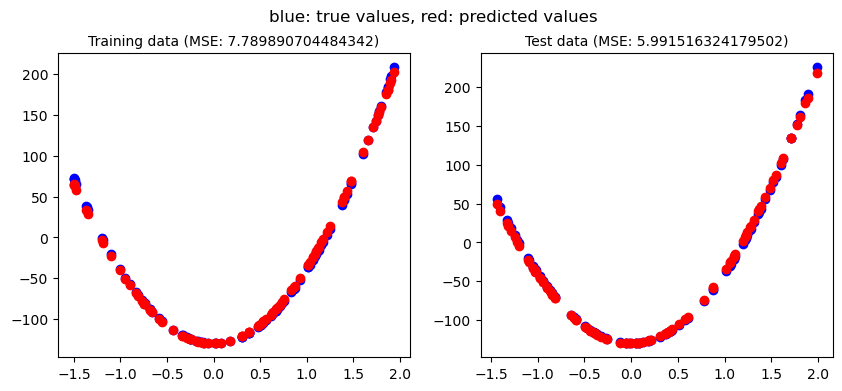

In [5]:
mlp = MLP(1,1, [10])

# hidden layer
mlp.layers[0].weights = np.array([1,1,1,1,1,1,1,1,1,1]).reshape(1,10)
mlp.layers[0].bias = np.array([2.3, 2,1,1,10, 10,1,1, -2, -2.3])
mlp.layers[0].activation = sigmoid

# output layer
mlp.layers[1].weights = np.array([-1000, -280, 1,1,1,1,1,1, 5, 1360]).reshape(10,1)
mlp.layers[1].bias = np.array([896]),
mlp.layers[1].activation = linear

plot_predictions(mlp, df_square, df_square_test)


Można zobaczyć po wartościach wag i biasów, że nie trzeba w tym przypadku dużo zmieniać w porównaniu z poprzednią siecią. Po prostu dodałem jedynki w kilku miejscach, żeby zgadzały się wymiary.

##### Sieć z dwiema warstwami ukrytymi po 5 neruonów

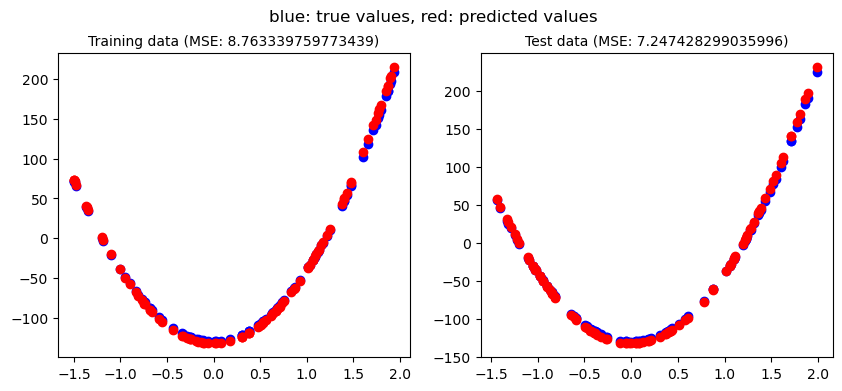

In [6]:
mlp = MLP(1,1, [5,5])

# hidden layer 1
mlp.layers[0].weights =np.array([-1.2 ,  0.7, -0.03,  1.2 , -1]).reshape(1,5)
mlp.layers[0].bias = np.array([-2.25 , -1.6 ,  0.8, -2.8  ,  2.1])
mlp.layers[0].activation = sigmoid

# hidden layer 2
mlp.layers[1].weights = np.array([
    [-2.6 , -0.6, -0.2, -1.3 ,  0.7],
    [-0.8 , -2.3 , -0.2, -0.6, -1.5  ],
    [-0.7 , -0.5, -2.4  , -0.9, -0.8],
    [-1.2  , -0.2 ,  0.4, -3  ,  1.2 ],
    [-1 , -0.6 , -0.4 , -1.3 ,  0.02]
]).T
mlp.layers[1].bias = np.array([ 0.5,  0.2, -0.1,  0.7,  0.6 ])
mlp.layers[1].activation = sigmoid

mlp.layers[2].weights = np.array([-1100,-300,-10,-200,-1000]).reshape(5,1)
mlp.layers[2].bias = np.array([1300]),
mlp.layers[2].activation = linear

plot_predictions(mlp, df_square, df_square_test)

Tutaj dopasowywanie wag i biasów ręcznie jest dużo bardziej skomplikowane, ponieważ jest dużo więcej parametrów., ale widać, że sieć da się dopasować się do danych.

#### 2. steps-large 

In [10]:
df_steps = pd.read_csv("data/regression/steps-large-training.csv",index_col=0)
df_steps_test = pd.read_csv("data/regression/steps-large-test.csv",index_col=0)
df_steps.head() 

,x,y
1,-1.481354,-80
2,1.033264,80
3,-0.076403,0
4,-1.419785,-80
5,-0.108398,0


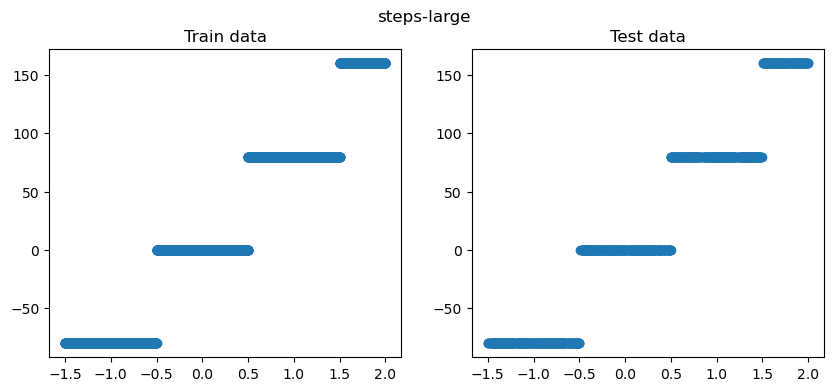

In [11]:
plot_data(title="steps-large",df_train = df_steps, df_test = df_steps_test)

Wartości zbioru to takie schody. 

##### Jedna warstwa ukryta o 5 neuronach


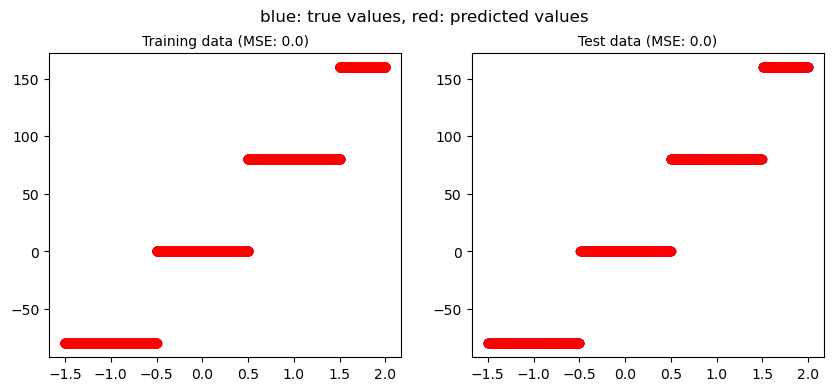

In [13]:
mlp = MLP(1,1, [5])

# hidden layer
mlp.layers[0].weights = np.array([ 20000000, 25000000, 40000000 , 0, 0]).reshape(1,5)
mlp.layers[0].bias = np.array([-30000000, -12500000, 20000000, 0,  0])
mlp.layers[0].activation = sigmoid

# output layer
mlp.layers[1].weights = np.array([ 80,80,80,0,0]).reshape(5,1)
mlp.layers[1].bias = np.array([-80])
mlp.layers[1].activation = linear

plot_predictions(mlp, df_steps, df_steps_test)

Tutaj sieć udało się dopasować idealnie, używając bardzo dużych wartości, aby skoki były jak "najszybsze" (chodzi o to, aby nie przewidywało wartości pomiędzy skokami).

##### Jedna warstwa ukryta o 10 neuronach


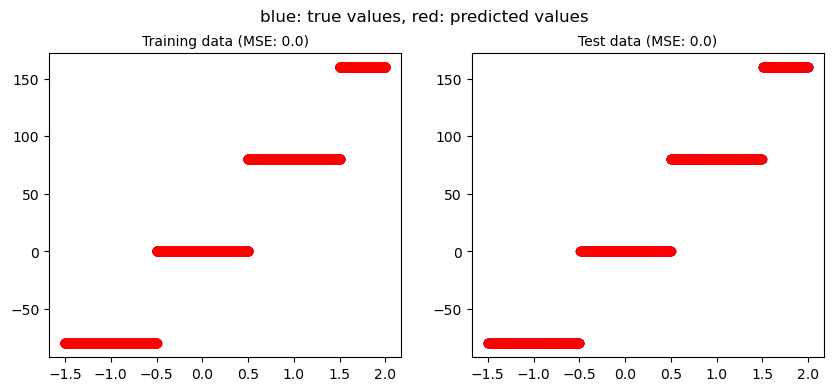

In [17]:
mlp = MLP(1,1, [5])

# hidden layer
mlp.layers[0].weights =np.array([ 20000000, 25000000, 40000000 , 0, 0, 0, 0, 0, 0,0]).reshape(1,10)
mlp.layers[0].bias = np.array([-30000000, -12500000, 20000000, 0,  0,0 , 0, 0, 0, 0])
mlp.layers[0].activation = sigmoid

# output layer
mlp.layers[1].weights = np.array([ 80,80,80,0,0,0,0,0,0,0]).reshape(10,1)
mlp.layers[1].bias = np.array([-80])
mlp.layers[1].activation = linear

plot_predictions(mlp, df_steps, df_steps_test)


##### Dwie warstwy ukryte po 10 neuronów


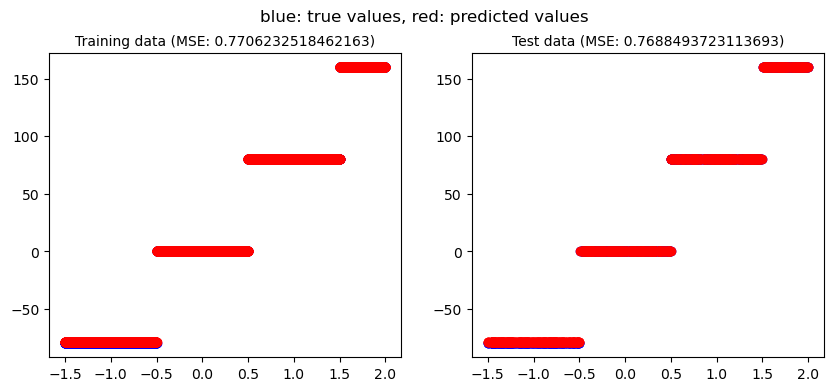

In [19]:
mlp = MLP(1,1, [5,5])

# hidden layer 1
mlp.layers[0].weights = np.array([ 20000000, 25000000, 40000000, 0, 0]).reshape(1,5)
mlp.layers[0].bias = np.array([-30000000, -12500000, 20000000, 0,  0])
mlp.layers[0].activation = sigmoid

# hidden layer 2
mlp.layers[1].weights = np.array([ 
    [20000000, 1, 1, -30, -30],
    [25000000, 1, 1, 10, -15],
    [40000000, 1, 1, 2, 0.7],
    [0, 0, 0, 6.6, 0],
    [0, 0, 0, 8.7, 8.2]
])
mlp.layers[1].bias = np.array([-30000000, -12500000, 20000000, 0,  -0.1])
mlp.layers[1].activation = sigmoid

# output layer
mlp.layers[2].weights = np.array([ 80,80,120,-80, -80]).reshape(5,1)
mlp.layers[2].bias = np.array([-40])
mlp.layers[2].activation = linear

plot_predictions(mlp, df_steps, df_steps_test)

Ogólne przemyślenia do tej pory są takie, że nie jest tak trudno zgadnąć niezłe wagi dla niewielkich sieci, szczególnie dla sieci o jednej warstwie z pięcioma neuronami. Im bardziej skomplikowana sieć tym trudniej się połapać jaki wpływ mają poszczególne parametry.

## LAB 2 - Propagacja wsteczna błędu

Dalsza implementacja sieci. Tutaj skupiam się na:

* uczeniu sieci neuronowej propagacją wsteczną błędu z aktualizacją wag po:
    1. wszystkich wzorcach
    2. pojedynczym wzorcu
    3. wzorcach w batchu
* porównaniu czasu uczenia dla tych wersji
* wizualizacji wartości wag sieci

#### 1. square-simple

In [1]:
from MLP import *  
df_train = pd.read_csv("data/regression/square-simple-training.csv",index_col=0)
df_test = pd.read_csv("data/regression/square-simple-test.csv",index_col=0)
df_train.head()

,x,y
1,-0.171543,-127.351580
2,0.025201,-129.942844
3,-1.368991,38.672367
4,1.907390,197.432191
5,0.011129,-129.988852


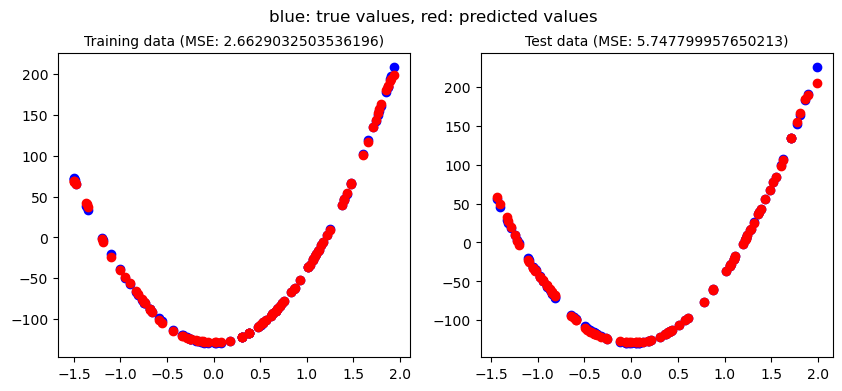

In [9]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[30])
time1, mse1, epochs1 =  mlp.fit(df_train["x"],df_train["y"], epochs=100000, learning_rate=0.002, batch_size=-1, loss_stop=1)
plot_predictions(mlp, df_train, df_test)

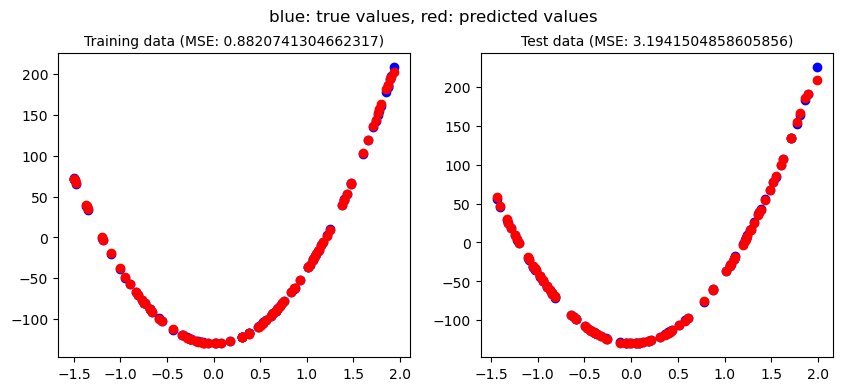

In [10]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[50])
time2, mse2, epochs2 =  mlp.fit(df_train["x"],df_train["y"], epochs=20000, learning_rate=0.01, batch_size=1,loss_stop=1)
plot_predictions(mlp, df_train, df_test)

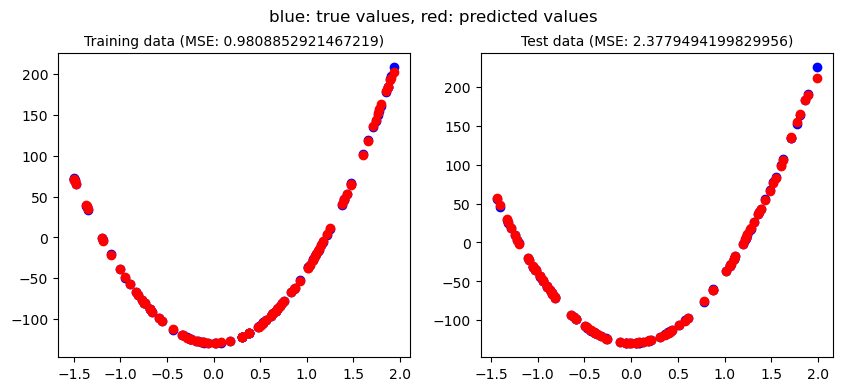

In [11]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[50])
time3, mse3, epochs3 =  mlp.fit(df_train["x"],df_train["y"], epochs=20000, learning_rate=0.01, batch_size=16,loss_stop=1)
plot_predictions(mlp, df_train, df_test)


Text(0.5, 1.0, 'MSE evolution')

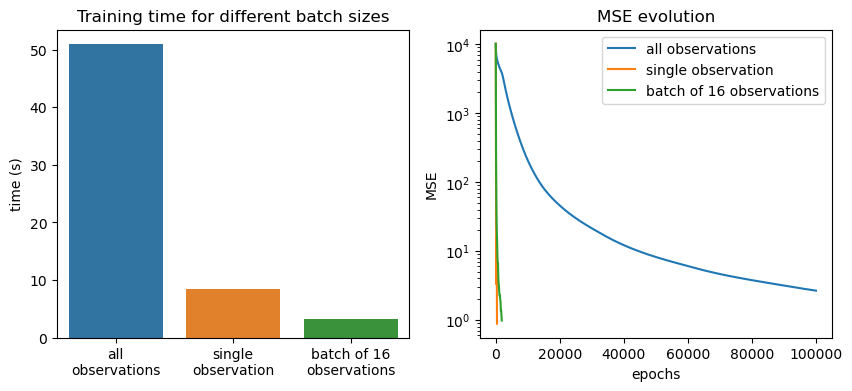

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
batch_size = 16

labels = ["all observations","single observation",f"batch of {batch_size} observations"]

axes[0] = sns.barplot(x=["all\nobservations", "single\nobservation",f"batch of {batch_size}\nobservations"],y=[time1,time2,time3], ax=axes[0])
axes[0].set_title("Training time for different batch sizes")
axes[0].set_ylabel("time (s)")

axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse1)-1)*100+1,100),[epochs1]]),y=mse1,label="all observations") 
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse2)-1)*100+1,100),[epochs2]]),y=mse2,label="single observation")
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse3)-1)*100+1,100),[epochs3]]),y=np.array(mse3),label=f"batch of {batch_size} observations")
axes[1].set_yscale("log")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("MSE")
axes[1].set_title("MSE evolution")



#### 2. steps-small

In [6]:
df_train = pd.read_csv("data/regression/steps-small-training.csv",index_col=0)
df_test = pd.read_csv("data/regression/steps-small-test.csv",index_col=0)
df_train.head()


,x,y
1,1.786896,160
2,1.189037,80
3,-0.917923,-80
4,-0.518967,-80
5,-0.011570,0


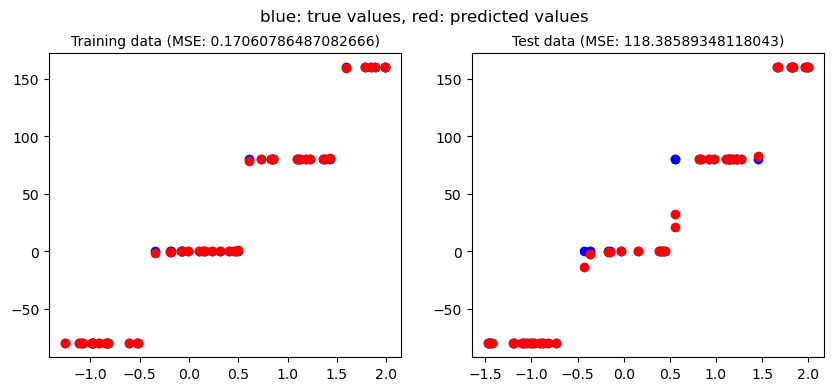

In [7]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[15,15,15])
time1, mse1, epochs1 =  mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.01, batch_size=-1, loss_stop=0.1)
plot_predictions(mlp, df_train, df_test)

Na tym wykresie widać, że pomimo idealnego wytrenowania na zbiorze treningowym, nie otrzymuje dobrych wyników na zbiorze testowym. Wydaję mi się, że to przez niefortunny podział.

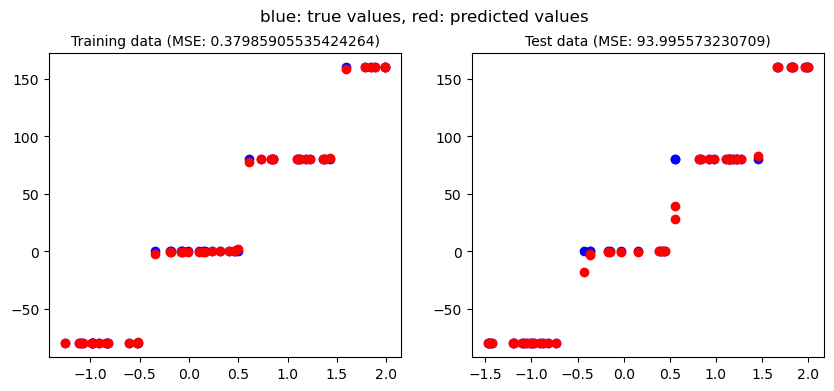

In [10]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[15,15,15])
time2, mse2, epochs2 =  mlp.fit(df_train["x"],df_train["y"], epochs=1000, learning_rate=0.001, batch_size=1,  loss_stop=0.1)

plot_predictions(mlp, df_train, df_test)

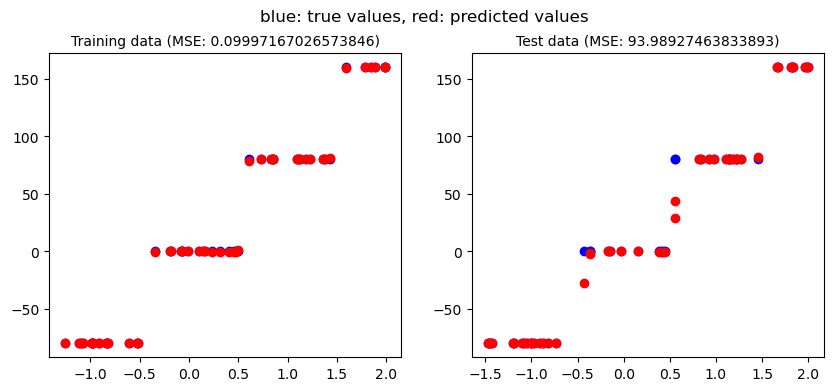

In [89]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[15,15,15])
time3, mse3, epochs3 =  mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.01, batch_size=16,  loss_stop=0.1)

plot_predictions(mlp, df_train, df_test)

Text(0.5, 1.0, 'MSE evolution')

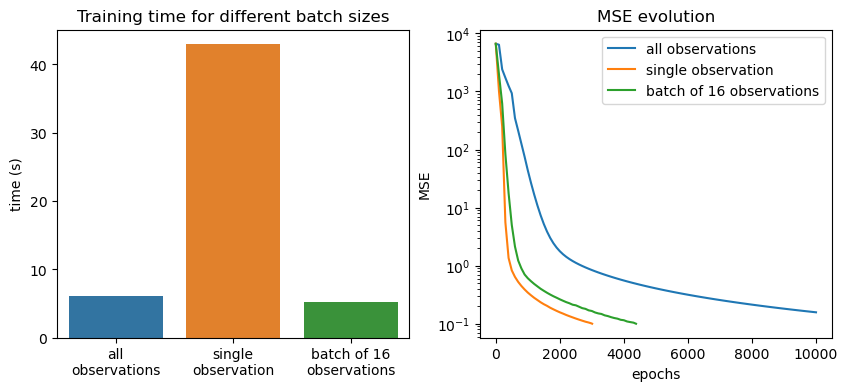

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
batch_size = 16

labels = ["all observations","single observation",f"batch of {batch_size} observations"]

axes[0] = sns.barplot(x=["all\nobservations", "single\nobservation",f"batch of {batch_size}\nobservations"],y=[time1,time2,time3], ax=axes[0])
axes[0].set_title("Training time for different batch sizes")
axes[0].set_ylabel("time (s)")

axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse1)-1)*100+1,100),[epochs1]]),y=mse1,label="all observations") 
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse2)-1)*100+1,100),[epochs2]]),y=mse2,label="single observation")
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse3)-1)*100+1,100),[epochs3]]),y=np.array(mse3),label=f"batch of {batch_size} observations")
axes[1].set_yscale("log")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("MSE")
axes[1].set_title("MSE evolution")

In [91]:
df_train = pd.read_csv("data/regression/multimodal-large-training.csv")
df_test = pd.read_csv("data/regression/multimodal-large-test.csv")
df_train.head()

,x,y
0,-0.685726,-74.197483
1,-0.879898,-30.504177
2,1.411932,10.754122
3,1.688954,100.248297
4,-0.573238,-73.832310


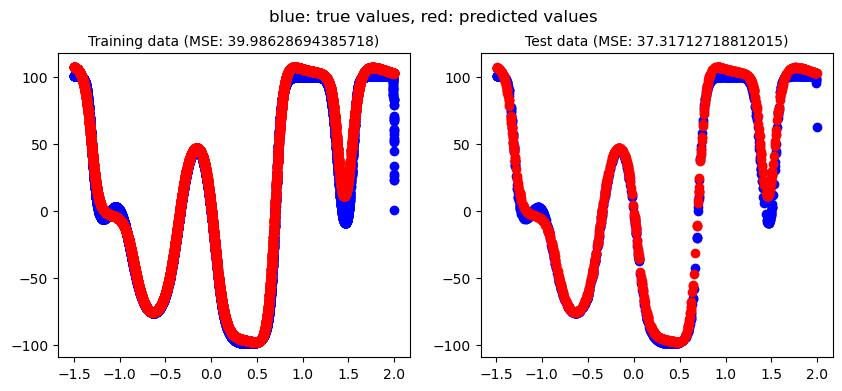

In [92]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[100])
time1, mse1, epochs1 =  mlp.fit(df_train["x"],df_train["y"], epochs=100000, learning_rate=0.05, batch_size=-1, loss_stop=40)

plot_predictions(mlp, df_train, df_test)

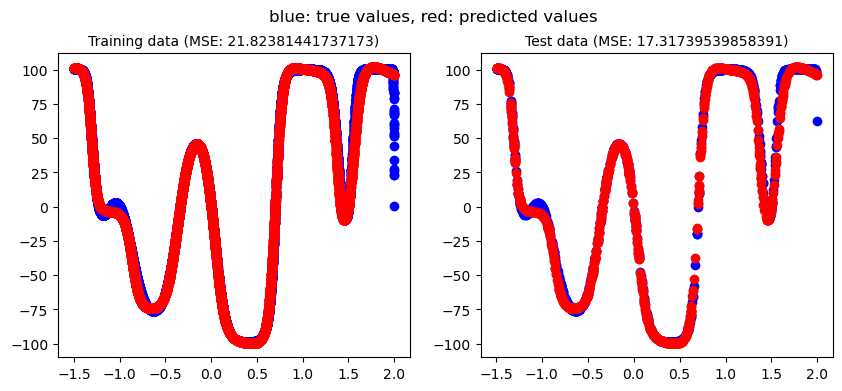

In [93]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[100])
time2, mse2, epochs2 =  mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.005, batch_size=1, loss_stop=40)

plot_predictions(mlp, df_train, df_test)

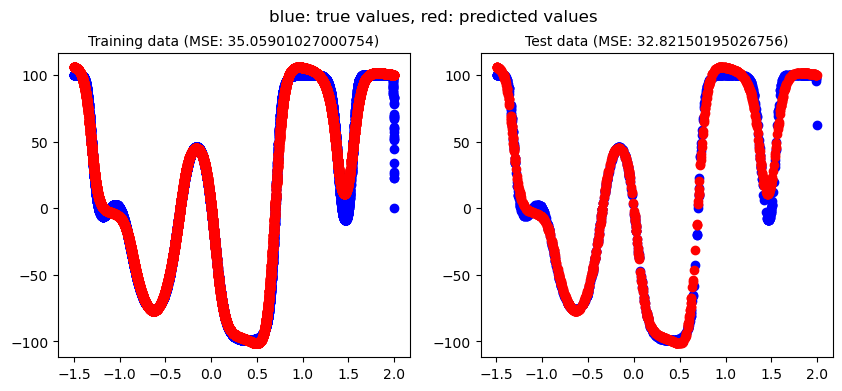

In [94]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[100])
time3, mse3, epochs3 =  mlp.fit(df_train["x"],df_train["y"], epochs=100000, learning_rate=0.05, batch_size=256, loss_stop=40)

plot_predictions(mlp, df_train, df_test)

Text(0.5, 1.0, 'MSE evolution')

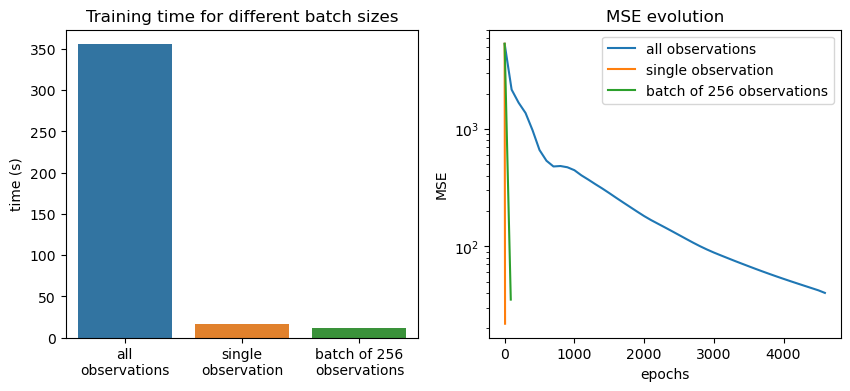

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
batch_size = 256

labels = ["all observations","single observation",f"batch of {batch_size} observations"]

axes[0] = sns.barplot(x=["all\nobservations", "single\nobservation",f"batch of {batch_size}\nobservations"],y=[time1,time2,time3], ax=axes[0])
axes[0].set_title("Training time for different batch sizes")
axes[0].set_ylabel("time (s)")

axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse1)-1)*100+1,100),[epochs1]]),y=mse1,label="all observations") 
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse2)-1)*100+1,100),[epochs2]]),y=mse2,label="single observation")
axes[1] = sns.lineplot(x=np.concatenate([np.arange(1,(len(mse3)-1)*100+1,100),[epochs3]]),y=np.array(mse3),label=f"batch of {batch_size} observations")
axes[1].set_yscale("log")
axes[1].set_xlabel("epochs")
axes[1].set_ylabel("MSE")

axes[1].set_title("MSE evolution")

### Wizualizacja wag

In [13]:
from MLP import *
df_train = pd.read_csv("data/regression/steps-small-training.csv",index_col=0)
df_test = pd.read_csv("data/regression/steps-small-test.csv",index_col=0)
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[15])

<Figure size 640x480 with 0 Axes>

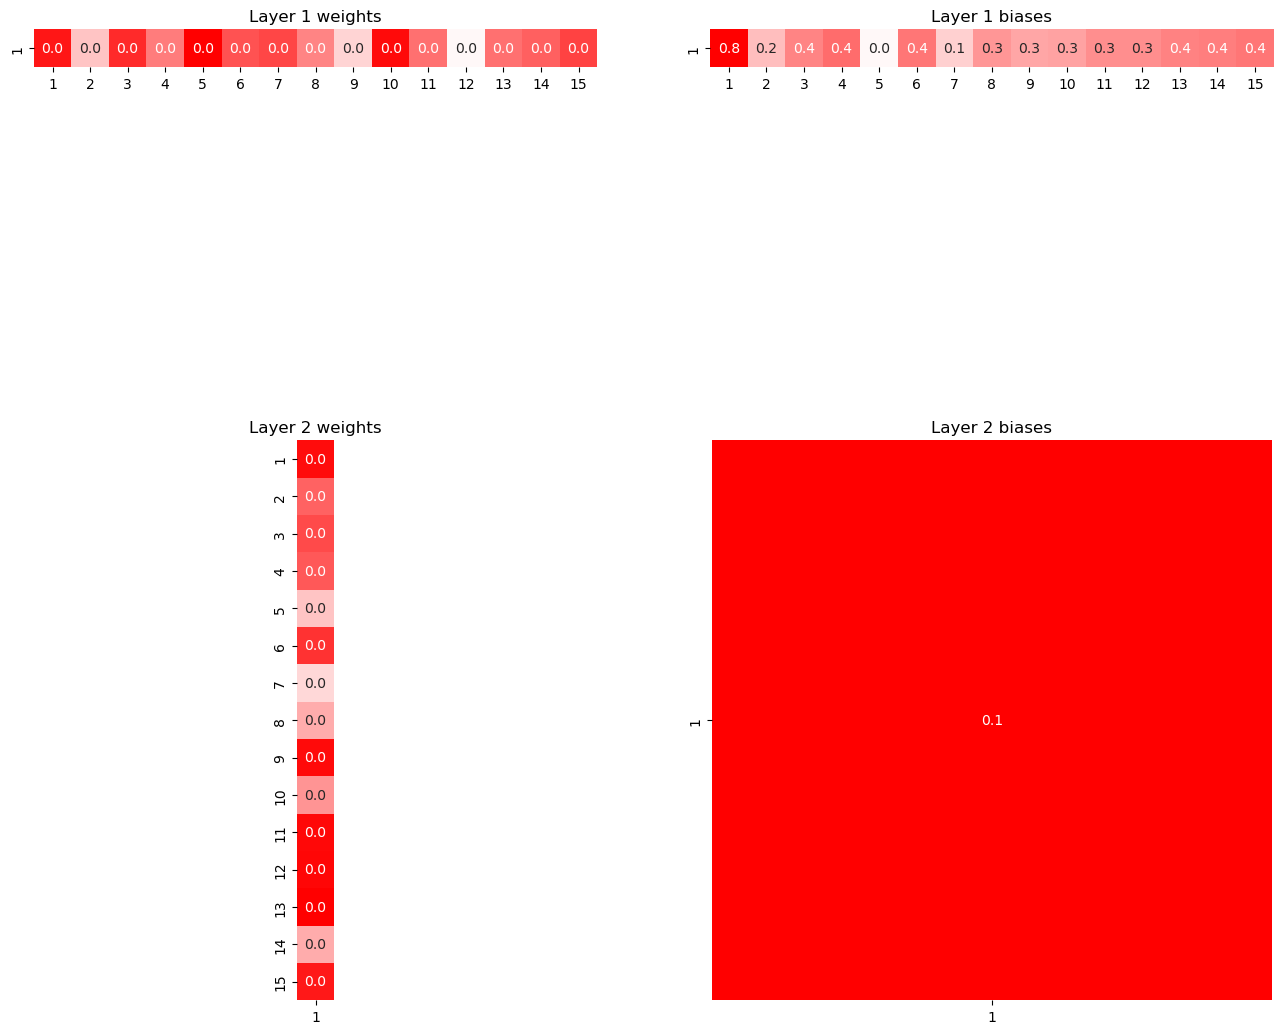

In [14]:
mlp.plot_weigths()

<Figure size 640x480 with 0 Axes>

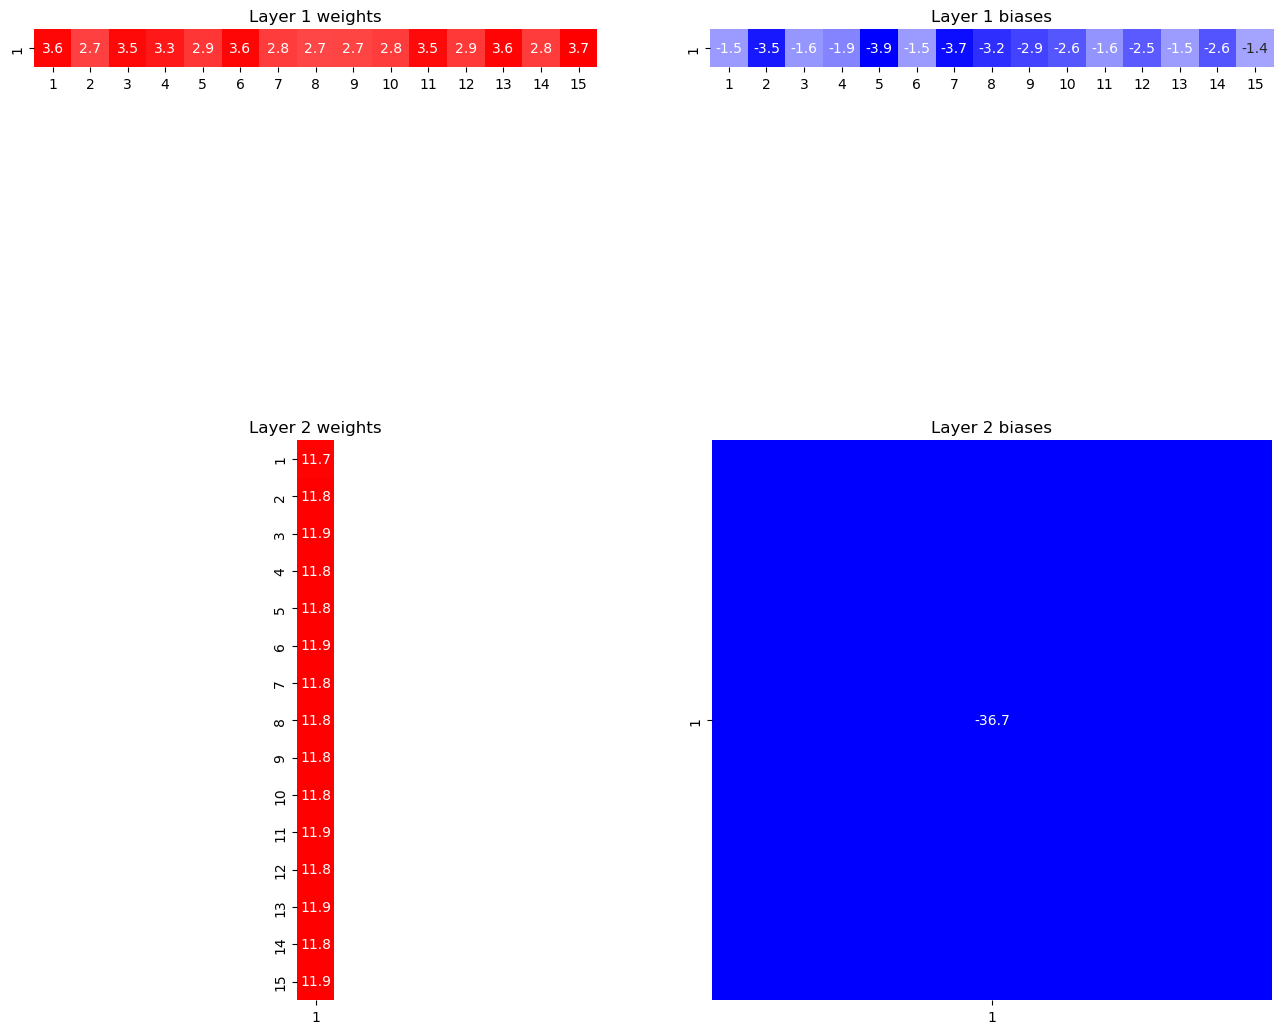

In [15]:
time, mse, epochs =  mlp.fit(df_train["x"],df_train["y"], epochs=100, learning_rate=0.01, batch_size=16, loss_stop=0.1)
mlp.plot_weigths()

<Figure size 640x480 with 0 Axes>

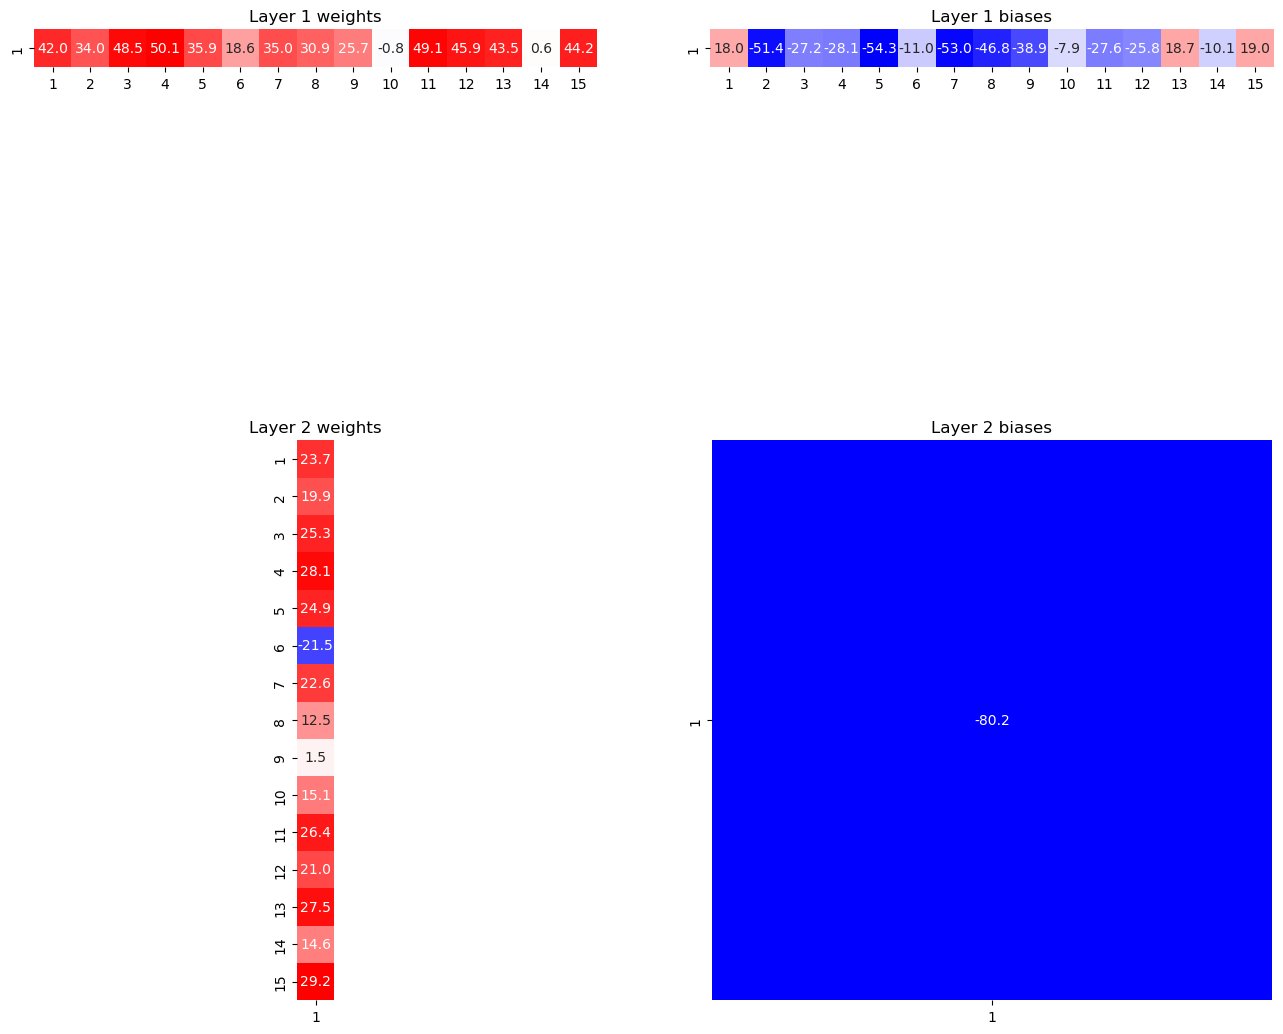

In [17]:
time, mse, epochs =  mlp.fit(df_train["x"],df_train["y"], epochs=50000, learning_rate=0.01, batch_size=16, loss_stop=0.1)
mlp.plot_weigths()

## LAB 3 - uczenie z momentem i normalizacja gradientu

Na tym labie do implementacji MLP, dodaje możliość uczenia przy użyciu:

- uczenia z momentem
- normalizacji gradientu (RMSProp)
- Adam Optimizer (uczenie z momentem + RMSProp)

#### square large

In [1]:
from MLP import *
np.random.seed(1234)
df_train = pd.read_csv("data/regression/square-large-training.csv",index_col=0)
df_test = pd.read_csv("data/regression/square-large-test.csv",index_col=0)


Na początku dla porówniania sieć nie używająca uczenia z momentem, ani normalizacji gradientu.

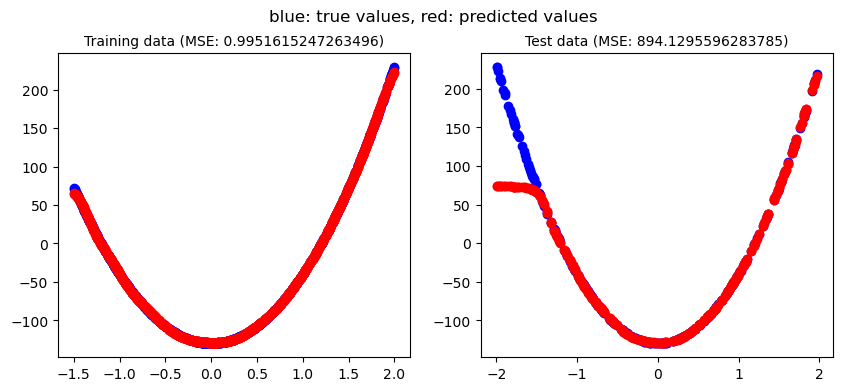

In [6]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[30]) 
times0, mse0, epochs0 = mlp.fit(df_train["x"],df_train["y"], epochs=2000, learning_rate=0.005,normalisation_coef=0, momentum_coef=0, batch_size=32, loss_stop=1)
plot_predictions(mlp, df_train, df_test)

Widać z wykresu, że podział na zbiór treningowy i testowy nie jest dobry. W zbiorze treningowym nie ma wcale wartości poniżej -1.5, a testowym jest ich wiele. 
Oprócz tego z odpalania uczenia sieci kilka razy z tym samym seedem z jakiegoś powodu czasy uczenia różnią się, więc w celu dokładniejszego porównania będę wykonywał kilka uczeń i jakoś je uśredniał.

Eksperyment będzie wyglądał następująco:

- fituję ustawienia sieci po 10 razy na maksymalej liczbie epoch 1000. Jeśli model nie osiągnął oczekiwanego mse w 1000 epoch znaczy, że jest słabo
- patrze na to jak przeciętnie uczy się każda sieć
- patrzę na wyniki najlepsze i wyniki najgorze

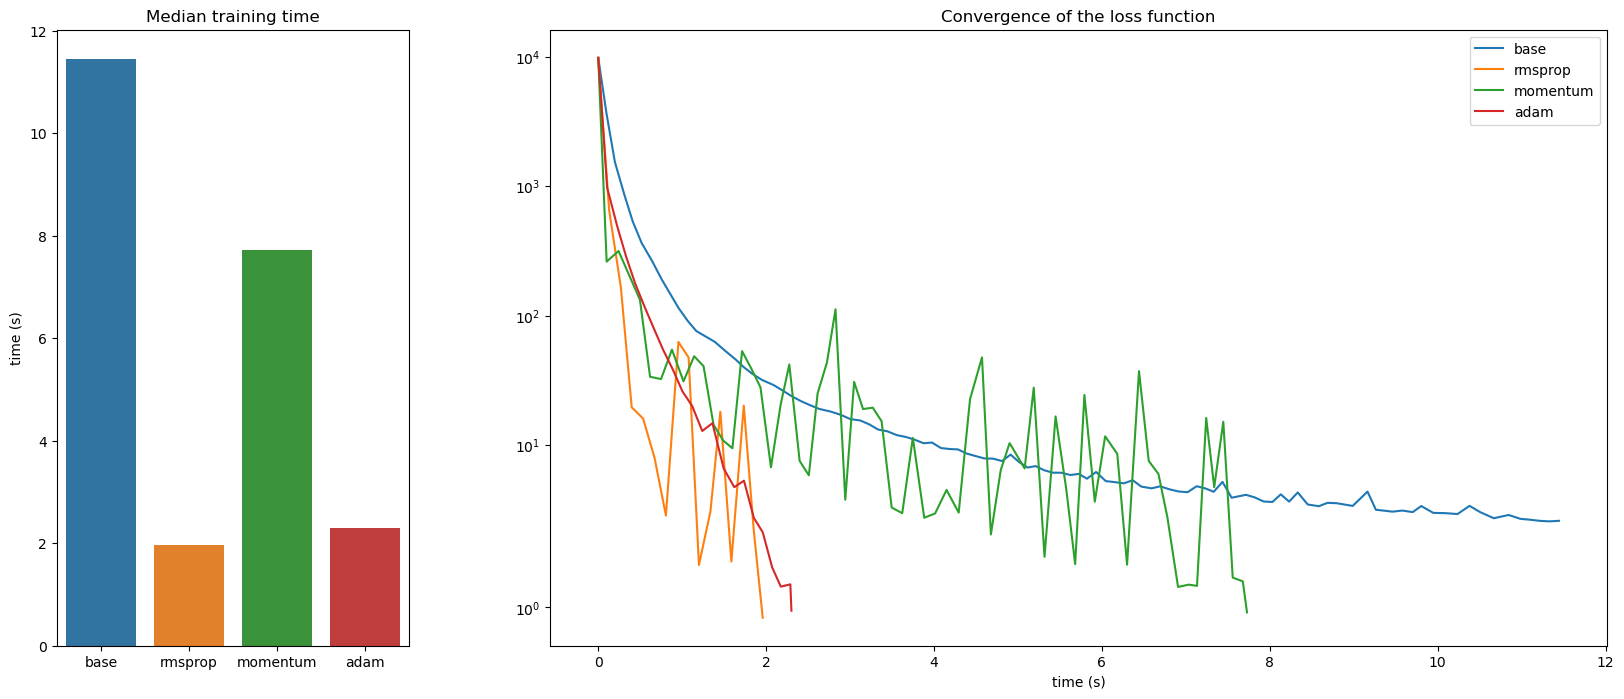

In [2]:
results = benchmark(df_train["x"],df_train["y"],hidden=[30], epochs=1000, batch_size=32, loss_stop=1, range_=10,
                         learning_rate_base=0.005, learning_rate_rmsprop=0.1, learning_rate_momentum=0.05,learning_rate_adam=0.1,
                         normalisation_coef= 0.99, momentum_coef=0.3, adam_coefs=[0.999,0.6])


In [3]:
results

,end_time_base,end_time_rmsprop,end_time_momentum,end_time_adam,end_epoch_base,end_epoch_rmsprop,end_epoch_momentum,end_epoch_adam,end_mse_base,end_mse_rmsprop,end_mse_momentum,end_mse_adam
0,13.049803,5.660595,13.780829,2.378976,1000,333,1000,202,5.031778,0.987854,11.639798,0.948849
1,11.297692,4.019017,13.743248,2.455969,1000,285,1000,210,2.676548,0.971693,34.655548,0.883489
2,11.970522,1.723323,10.587223,2.403061,1000,148,1000,207,2.594821,0.856373,21.263482,0.945909
3,10.171280,2.024465,1.507686,2.345821,1000,181,149,197,2.760054,0.827108,0.984919,0.965371
4,9.957027,2.013632,2.930712,2.293722,1000,190,288,201,1.055400,0.981273,0.964793,0.954141
5,10.174878,0.887946,6.575872,1.823518,974,81,634,154,0.991402,0.973619,0.930462,0.880578
6,10.564576,0.989901,3.205489,2.458713,1000,89,286,206,1.363619,0.738408,0.877551,0.949449
7,10.187965,10.682149,4.818050,1.433439,1000,1000,486,135,3.016018,8.886140,0.960656,0.904315
8,9.904317,0.679778,10.596910,2.342849,1000,63,1000,206,2.475909,0.936472,30.646256,0.918723
9,9.786626,1.303979,10.379586,1.109744,927,116,1000,92,0.996972,0.976724,5.057830,0.826389


#### steps-large

In [3]:
df_train = pd.read_csv("data/regression/steps-large-training.csv",index_col=0)
df_test = pd.read_csv("data/regression/steps-large-test.csv",index_col=0)

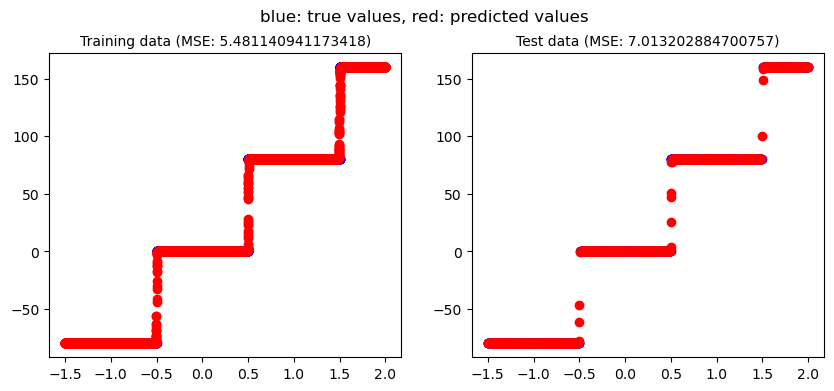

In [63]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[10,10]) 
times0, mse0, epochs0 = mlp.fit(df_train["x"],df_train["y"], epochs=10000, learning_rate=0.01,momentum_coef=0.9,normalisation_coef=0.99, batch_size=256, loss_stop=3)
plot_predictions(mlp, df_train, df_test)

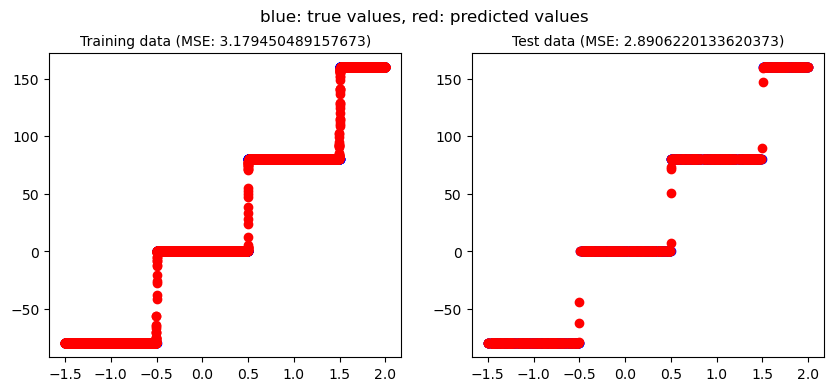

In [52]:
times0, mse0, epochs0 = mlp.fit(df_train["x"],df_train["y"], epochs=1000, momentum_coef =0, normalisation_coef = 0,learning_rate=0.000001, batch_size=256, loss_stop=3.1)
plot_predictions(mlp, df_train, df_test)


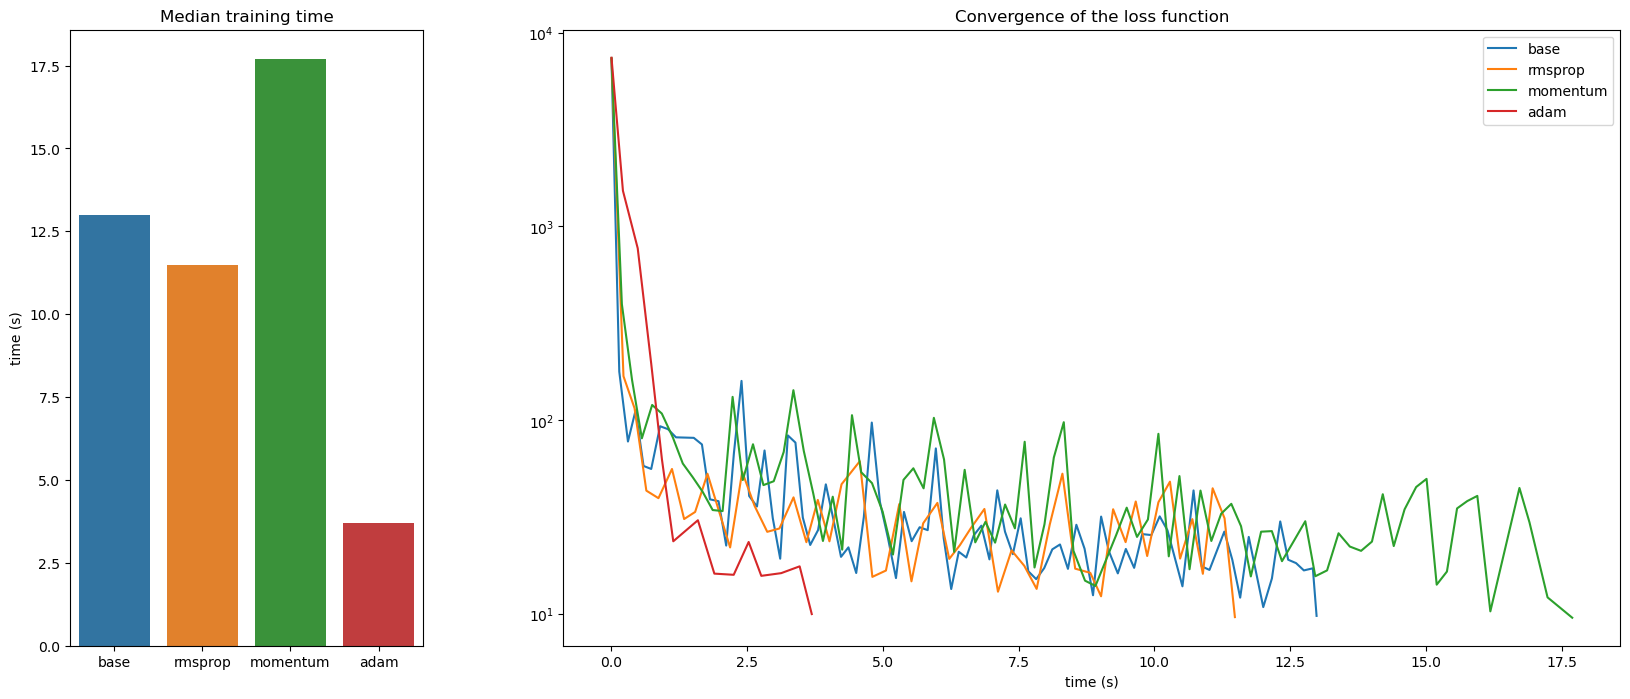

In [101]:
results = benchmark(df_train["x"],df_train["y"],hidden=[10,10], epochs=1000, batch_size=500, loss_stop=10, range_=10,
                         learning_rate_base=0.05, learning_rate_rmsprop=0.1, learning_rate_momentum=0.05,learning_rate_adam=0.1,
                         normalisation_coef= 0.999, momentum_coef=0.3, adam_coefs=[0.999,0.99])

In [102]:
results

,end_time_base,end_time_rmsprop,end_time_momentum,end_time_adam,end_epoch_base,end_epoch_rmsprop,end_epoch_momentum,end_epoch_adam,end_mse_base,end_mse_rmsprop,end_mse_momentum,end_mse_adam
0,17.534774,11.482506,23.272365,4.674429,666,509,1000,224,9.827256,9.615006,30.525863,9.633327
1,12.152274,14.538674,17.696102,6.848808,616,721,876,165,9.890441,9.147143,9.544936,9.877997
2,11.113553,13.866409,55.921710,14.638275,554,578,991,258,9.340823,9.261940,9.411488,9.817225
3,28.658779,11.580659,19.625460,3.930009,704,560,1000,182,9.942720,9.516446,16.283298,9.895498
4,22.432580,10.205364,15.199412,4.829153,760,478,810,192,9.967699,9.959890,9.192688,9.857913
5,20.883012,12.686888,27.567879,3.688788,802,476,1000,127,9.397057,9.478201,19.766764,9.968039
6,15.740198,11.652816,36.277605,3.348807,719,458,1000,174,9.526905,9.653949,39.824882,9.803618
7,11.435675,9.943736,15.293644,1.861615,641,562,972,112,9.892536,9.722624,9.987103,9.444182
8,12.483064,7.912503,15.177488,1.759152,834,496,1000,111,8.582689,9.750107,31.363288,9.651580
9,12.987055,10.251363,12.164672,2.650949,845,652,827,169,9.754170,9.976806,9.762683,9.709270


#### multimodal-large

In [104]:
df_train = pd.read_csv("data/regression/multimodal-large-training.csv")
df_test = pd.read_csv("data/regression/multimodal-large-test.csv")

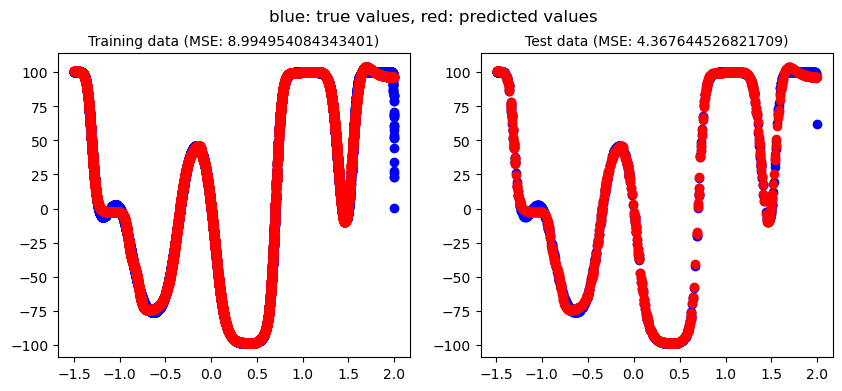

In [110]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[100]) 
times0, mse0, epochs0 = mlp.fit(df_train["x"],df_train["y"], epochs=1000, learning_rate=0.1,momentum_coef=0.9,normalisation_coef=0.99, batch_size=500, loss_stop=9)
plot_predictions(mlp, df_train, df_test)

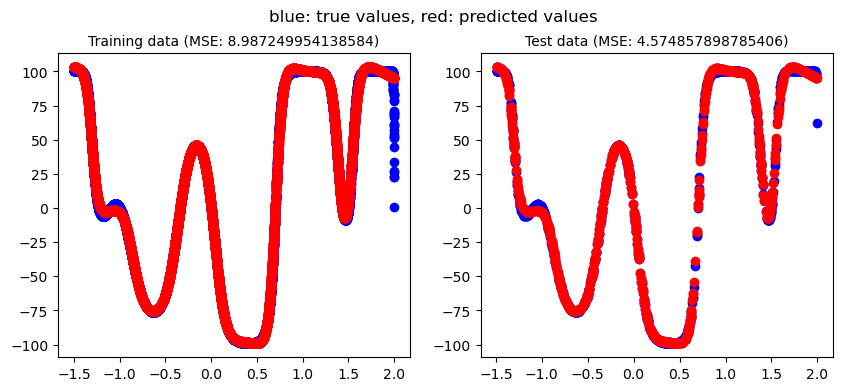

In [155]:
mlp = MLP(input_dim=1, output_dim=1, hidden_dims=[100]) 
times0, mse0, epochs0 = mlp.fit(df_train["x"],df_train["y"], epochs=1000, learning_rate=0.05,momentum_coef=0.05,normalisation_coef=0, batch_size=500, loss_stop=9)
plot_predictions(mlp, df_train, df_test)

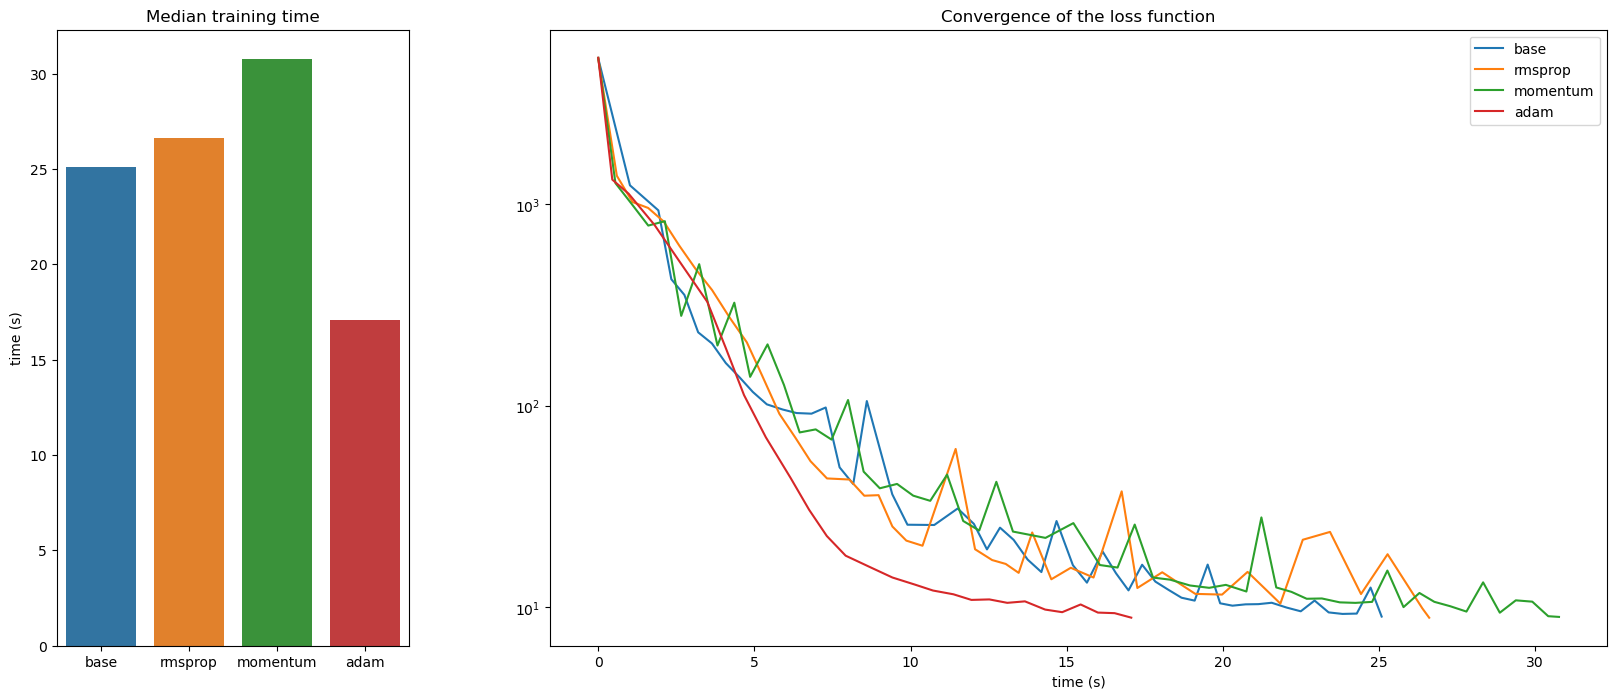

In [157]:
results = benchmark(df_train["x"],df_train["y"],hidden=[100], epochs=1000, batch_size=500, loss_stop=9, range_=10,
                         learning_rate_base=0.05, learning_rate_rmsprop=0.1, learning_rate_momentum=0.05,learning_rate_adam=0.1,
                         normalisation_coef= 0.999, momentum_coef=0.05, adam_coefs=[0.99,0.9])

In [147]:
results

,end_time_base,end_time_rmsprop,end_time_momentum,end_time_adam,end_epoch_base,end_epoch_rmsprop,end_epoch_momentum,end_epoch_adam,end_mse_base,end_mse_rmsprop,end_mse_momentum,end_mse_adam
0,28.082220,23.508693,20.764303,6.276202,1000,1000,1000,278,2519.636282,2519.625224,2519.644174,9.399269
1,26.628539,33.807251,21.016052,22.852260,1000,1000,1000,1000,1348.512171,1006.494604,2519.666909,548.703172


In [145]:
results

,end_time_base,end_time_rmsprop,end_time_momentum,end_time_adam,end_epoch_base,end_epoch_rmsprop,end_epoch_momentum,end_epoch_adam,end_mse_base,end_mse_rmsprop,end_mse_momentum,end_mse_adam
0,24.755338,24.162233,18.924849,35.891602,1000,1000,1000,1000,2520.558817,1006.454763,2519.805457,2521.937655
1,26.646608,30.058207,25.620589,26.442234,1000,1000,1000,1000,2519.592962,1505.576641,2519.701823,2182.159998
2,30.117500,30.692605,26.876361,27.081868,1000,1000,1000,1000,2519.528026,3902.452014,1504.205096,2519.456461
3,27.057638,30.799880,30.597001,15.646580,1000,1000,1000,440,2519.566639,1450.577989,2519.851352,9.950159
4,25.592421,21.066833,19.084373,20.753320,1000,1000,1000,1000,1347.864746,2457.734945,2519.632972,2519.514218
5,18.450174,19.502353,18.925816,22.934199,1000,1000,1000,1000,2459.349130,1436.091377,2519.596320,548.759904
6,18.903030,23.399157,18.713160,26.411784,1000,1000,1000,1000,1519.505579,1502.847172,2519.685890,1501.962979
7,23.250874,24.309999,20.012784,21.679887,1000,1000,1000,1000,2520.854455,2185.840218,2519.671606,2519.872617
8,18.992373,20.148912,19.248025,8.847139,1000,1000,1000,412,2520.201499,5177.301564,2519.629538,9.745036
9,19.774011,20.936955,18.243875,20.043699,1000,1000,1000,1000,2519.613694,759.326032,2519.602019,1348.302765
